In [1]:
# Book: Machine learning in production
# Ch.9, p.89

In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# generte the data points 
N = 20
x = np.random.uniform(size=N)
y = np.sin(x*10) + 0.05*np.random.normal(size=N)

In [27]:
# we will split the data into training and testing data (50% each)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=10)

In [28]:
# we will ro regression fits of increasing powers of x
k = 10
X = pd.DataFrame({'x^{}'.format(i): x_train**i for i in range(k)})
X['y'] = y_train

X_test = pd.DataFrame({'x^{}'.format(i): x_test**i for i in range(k)})
X_test['y'] = y_test

x_pred = np.arange(min(x), max(x), 0.001)
X_pred = pd.DataFrame({'x^{}'.format(i): x_pred**i for i in range(k)})

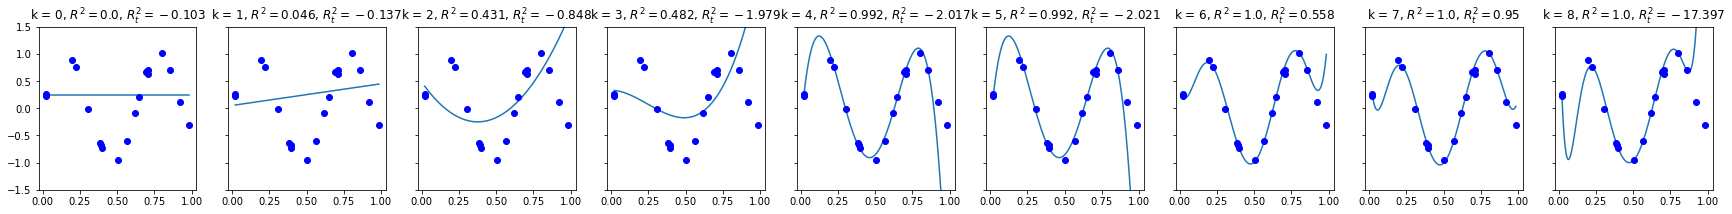

In [29]:
# Run the regressions and plot the results

f, axes = plt.subplots(1, k-1, sharey =  True, figsize = (30,3))

for i in range(k-1):
    model = LinearRegression()
    model = model.fit(X[['x^{}'.format(l) for l in range(i+1)]],
                        X['y'])
    model_y_pred = model.predict(
                        X_pred[['x^{}'.format(l) for l in range(i+1)]])
    score = model.score(X[['x^{}'.format(l) for l in range(i+1)]], 
                        X['y'])
    test_score = model.score(
                        X_test[['x^{}'.format(l) for l in range(i+1)]],
                        X_test['y'])
    axes[i].plot(x_pred, model_y_pred)
    axes[i].plot(x, y, 'bo')
    axes[i].set_title('k = {}, $R^2={}$, $R^2_t={}$'
                     .format(i, round(score,3), round(test_score,3)))

plt.ylim(-1.5,1.5)
plt.show()
    